# Project Name : Win Prediction



## Exploratory Data Analysis

In [1]:
#Loading important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the data set

df = pd.read_excel("Win_Prediction_Data.xlsx")

In [3]:
#Overview of data

df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [5]:
#Percentage of null values present in each feature

df.isnull().mean()

Client Category     0.007852
Solution Type       0.000000
Deal Date           0.000000
Sector              0.000000
Location            0.000000
VP Name             0.000000
Manager Name        0.000000
Deal Cost           0.000000
Deal Status Code    0.000000
dtype: float64

In [6]:
#Sum of null values in each feature

df.isnull().sum()

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64

In [7]:
df.describe()

,Deal Cost
count,1.006100e+04
mean,7.668969e+05
std,1.619894e+06
min,0.000000e+00
25%,1.897059e+05
50%,3.823529e+05
75%,7.647059e+05
max,3.676471e+07


In [8]:
df["Deal Cost"].value_counts()

294117.65     508
588235.29     390
441176.47     377
147058.82     363
0.00          246
             ... 
7004117.65      1
331470.59       1
193235.29       1
770882.35       1
414705.88       1
Name: Deal Cost, Length: 1469, dtype: int64

We have 246 rows with Deal Cost as o

In [9]:
df.describe(include="object")

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Status Code
count,9982,10061,10061,10061,10061,10061,10061
unique,41,67,25,13,43,278,2
top,Others,Solution 32,Sector 23,L10,Mervin Harwood,Molly Eakes,Lost
freq,1763,1439,2693,3360,1166,323,6306


### Deal Status Code: Target Variable

In [10]:
df["Deal Status Code"].value_counts()

Lost    6306
Won     3755
Name: Deal Status Code, dtype: int64

<AxesSubplot:xlabel='Deal Status Code', ylabel='count'>

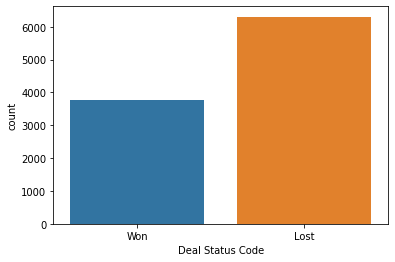

In [11]:
sns.countplot(df["Deal Status Code"])

In [12]:
6306/10061*100 #63% we have lost status in our dataset

62.677666235960636

In [13]:
3755/10061*100 #37% we have won status in our dataset

37.322333764039364

### Client Category

In [14]:
df['Client Category'].value_counts()

Others                   1763
Internal                 1454
Services_based           1202
Tech                      913
Domestic Public Bank      419
International Bank        376
Consulting                352
Finance                   339
Telecom                   327
Power ind                 264
Domestic Private Bank     262
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            152
Domestic Bank             134
Retail_market             126
Govt                      121
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce                 32
Airpline  

In [15]:
len(df['Client Category'].unique())

42

In [16]:
x = pd.crosstab(df["Client Category"],df["Deal Status Code"])

In [17]:
x["Wining %age"] = (x["Won"]/(x["Lost"]+x["Won"]))*100

In [18]:
x

Deal Status Code,Lost,Won,Wining %age
Client Category,,,
Airpline,22,5,18.518519
Automobiles,112,66,37.078652
Consulting,182,170,48.295455
Consumer Good,98,87,47.027027
Domestic Bank,78,56,41.791045
Domestic Private Bank,176,86,32.824427
Domestic Public Bank,324,95,22.673031
Electronics,54,27,33.333333
Energy,32,25,43.859649


In [19]:
x["Wining %age"].sort_values(ascending = False).head(10)

Client Category
Share_market          71.428571
Internal              52.269601
Management            48.837209
Consulting            48.295455
Consumer Good         47.027027
Holding               44.000000
Energy                43.859649
International Bank    42.553191
Power ind             42.424242
Infrastructure        42.105263
Name: Wining %age, dtype: float64

These are ten those client category where we have wining percentage more than 40%.

### Solution Type

In [20]:
df['Solution Type'].value_counts()

Solution 32    1439
Solution 9     1418
Solution 10    1016
Solution 39     585
Solution 67     584
               ... 
Solution 56       1
Solution 18       1
Solution 57       1
Solution 64       1
Solution 19       1
Name: Solution Type, Length: 67, dtype: int64

In [21]:
a = pd.crosstab(df["Solution Type"],df["Deal Status Code"])

In [22]:
a["Wining %age"] = (a["Won"]/(a["Lost"]+a["Won"]))*100

In [23]:
a

Deal Status Code,Lost,Won,Wining %age
Solution Type,,,
Solution 1,2,3,60.000000
Solution 10,690,326,32.086614
Solution 11,88,52,37.142857
Solution 12,342,98,22.272727
Solution 13,214,98,31.410256
...,...,...,...
Solution 66,0,1,100.000000
Solution 67,408,176,30.136986
Solution 7,116,62,34.831461


In [24]:
a[a["Wining %age"]>=40]

Deal Status Code,Lost,Won,Wining %age
Solution Type,,,
Solution 1,2,3,60.000000
Solution 14,42,28,40.000000
Solution 18,0,1,100.000000
Solution 19,0,1,100.000000
Solution 2,8,11,57.894737
Solution 20,60,72,54.545455
Solution 24,0,5,100.000000
Solution 25,2,3,60.000000
Solution 26,14,10,41.666667


### Sector 

In [25]:
df['Sector'].value_counts()

Sector 23    2693
Sector 2     1748
Sector 20     773
Sector 12     607
Sector 24     578
Sector 16     474
Sector 17     474
Sector 15     387
Sector 9      369
Sector 25     273
Sector 18     251
Sector 1      231
Sector 13     185
Sector 22     144
Sector 19     142
Sector 3      135
Sector 4      128
Sector 11     114
Sector 14     109
Sector 6       96
Sector 5       64
Sector 8       39
Sector 21      30
Sector 7       14
Sector 10       3
Name: Sector, dtype: int64

In [26]:
print("Sector feature has {} labels".format(len(df['Sector'].value_counts())))

Sector feature has 25 labels


In [27]:
b = pd.crosstab(df["Sector"],df["Deal Status Code"]);b

Deal Status Code,Lost,Won
Sector,,
Sector 1,158,73
Sector 10,2,1
Sector 11,86,28
Sector 12,406,201
Sector 13,148,37
Sector 14,82,27
Sector 15,234,153
Sector 16,316,158
Sector 17,274,200


In [28]:
b["Wining %age"] = (b["Won"]/(b["Lost"]+b["Won"]))*100;b

Deal Status Code,Lost,Won,Wining %age
Sector,,,
Sector 1,158,73,31.601732
Sector 10,2,1,33.333333
Sector 11,86,28,24.561404
Sector 12,406,201,33.113674
Sector 13,148,37,20.000000
Sector 14,82,27,24.770642
Sector 15,234,153,39.534884
Sector 16,316,158,33.333333
Sector 17,274,200,42.194093


In [29]:
b[b["Wining %age"]>=40]

Deal Status Code,Lost,Won,Wining %age
Sector,,,
Sector 17,274,200,42.194093
Sector 19,84,58,40.845070
Sector 20,384,389,50.323415
Sector 21,10,20,66.666667
Sector 7,6,8,57.142857
Sector 9,202,167,45.257453


### Location

In [30]:
df['Location'].value_counts()

L10       3360
L5        2328
L1        1572
Others     817
L3         556
L11        367
L12        276
L9         240
L7         238
L4         188
L6         100
L8          11
L2           8
Name: Location, dtype: int64

<AxesSubplot:xlabel='Location', ylabel='count'>

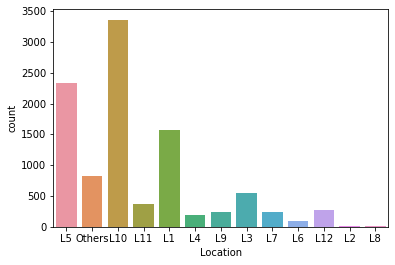

In [31]:
sns.countplot(df['Location'])

In [32]:
c = pd.crosstab(df["Location"],df["Deal Status Code"]);c

Deal Status Code,Lost,Won
Location,,
L1,912,660
L10,2230,1130
L11,232,135
L12,178,98
L2,6,2
L3,356,200
L4,126,62
L5,1392,936
L6,70,30


In [33]:
c["Wining %age"] = (c["Won"]/(c["Lost"]+c["Won"]))*100;c

Deal Status Code,Lost,Won,Wining %age
Location,,,
L1,912,660,41.984733
L10,2230,1130,33.630952
L11,232,135,36.784741
L12,178,98,35.507246
L2,6,2,25.000000
L3,356,200,35.971223
L4,126,62,32.978723
L5,1392,936,40.206186
L6,70,30,30.000000


### VP Name

In [34]:
d = pd.crosstab(df["VP Name"],df["Deal Status Code"]);d

Deal Status Code,Lost,Won
VP Name,,
Alam Syed,62,64
Ankita Aggarwal,866,277
Brendon Wycoff,132,57
Clinton Mani,124,60
Dennis Faux,12,1
Earline Langton,52,30
Ekta Zutshi,206,344
Gaurav Sameria,66,48
Gayle Molter,74,30


In [35]:
d["Wining %age"] = (d["Won"]/(d["Lost"]+d["Won"]))*100;d

Deal Status Code,Lost,Won,Wining %age
VP Name,,,
Alam Syed,62,64,50.793651
Ankita Aggarwal,866,277,24.234471
Brendon Wycoff,132,57,30.158730
Clinton Mani,124,60,32.608696
Dennis Faux,12,1,7.692308
Earline Langton,52,30,36.585366
Ekta Zutshi,206,344,62.545455
Gaurav Sameria,66,48,42.105263
Gayle Molter,74,30,28.846154


In [36]:
d["Wining %age"].sort_values(ascending = False).head(10)

VP Name
Ekta Zutshi           62.545455
Prashant Rawat        55.555556
Vikram Rawat          52.941176
Long Bergstrom        51.140065
Alam Syed             50.793651
Molly Eakes           47.619048
Lilli Storrs          46.153846
neeraj kumar          46.072187
Man Suddeth           44.827586
Jitendra Choudhary    42.857143
Name: Wining %age, dtype: float64

### Manager Name

In [37]:
df['Manager Name'].value_counts()

Molly Eakes        323
Rudraksh Sharma    270
Desmond Krout      230
Gayle Molter       186
Manpreet Singh     181
                  ... 
Jayant Kalra         1
Ali Rafiq            1
Sultan Khan          1
Anish Jonson         1
Ike Deppen           1
Name: Manager Name, Length: 278, dtype: int64

In [38]:
e = pd.crosstab(df["Manager Name"],df["Deal Status Code"]);e

Deal Status Code,Lost,Won
Manager Name,,
Aastha Gandhi,0,1
Abhinav Warrier,80,15
Abhishek Singhal,44,23
Abhiskek Kumar,56,38
Abhiskhek D,36,25
...,...,...
shyam kumar,40,12
som dutt,0,3
sunder paal,2,6


In [39]:
e["Wining %age"] = (e["Won"]/(e["Lost"]+e["Won"]))*100;e

Deal Status Code,Lost,Won,Wining %age
Manager Name,,,
Aastha Gandhi,0,1,100.000000
Abhinav Warrier,80,15,15.789474
Abhishek Singhal,44,23,34.328358
Abhiskek Kumar,56,38,40.425532
Abhiskhek D,36,25,40.983607
...,...,...,...
shyam kumar,40,12,23.076923
som dutt,0,3,100.000000
sunder paal,2,6,75.000000


In [40]:
e["Wining %age"].sort_values(ascending = False).head(50)

Manager Name
Aastha Gandhi          100.000000
Anish Jonson           100.000000
Vaibhav Somaskandan    100.000000
Uzaar Ali              100.000000
Upendra Bhatt          100.000000
Taran Singh            100.000000
Sumita Verma           100.000000
Sumit Arora            100.000000
Sultan Khan            100.000000
Arti Bindra            100.000000
Cleotilde Biron        100.000000
Rishab Jain            100.000000
Cori Gillispie         100.000000
Rishab Bhatt           100.000000
Ike Deppen             100.000000
Matt Redel             100.000000
Nanette Hennessee      100.000000
Rahul Singh            100.000000
Heath Mullarkey        100.000000
Ekta Zutshi            100.000000
Harshita Singh         100.000000
Natalia Dumlao         100.000000
Preston Dumire         100.000000
Preetan Gujar          100.000000
Prashant singh         100.000000
Palmer Holmberg        100.000000
Genny Mcgivney         100.000000
Anju Nanda             100.000000
Jayant Kalra           100.000000
N

In [41]:
e[e["Wining %age"]==100]

Deal Status Code,Lost,Won,Wining %age
Manager Name,,,
Aastha Gandhi,0,1,100.0
Akhil Biyas,0,2,100.0
Ali Rafiq,0,1,100.0
Anish Jonson,0,1,100.0
Anju Nanda,0,1,100.0
Arti Bindra,0,1,100.0
Cleotilde Biron,0,1,100.0
Cori Gillispie,0,1,100.0
Ekta Zutshi,0,10,100.0


In [42]:
print(len(e[e["Wining %age"]==100]))

40


### Deal Cost

In [43]:
df["Deal Cost"].describe()

count    1.006100e+04
mean     7.668969e+05
std      1.619894e+06
min      0.000000e+00
25%      1.897059e+05
50%      3.823529e+05
75%      7.647059e+05
max      3.676471e+07
Name: Deal Cost, dtype: float64

<AxesSubplot:xlabel='Deal Cost', ylabel='Count'>

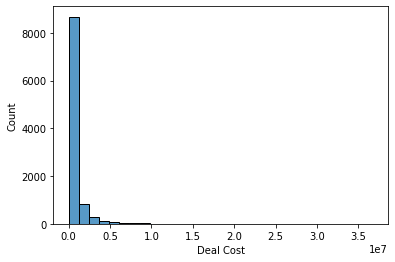

In [44]:
sns.histplot(df["Deal Cost"], bins = 30)

<AxesSubplot:xlabel='Deal Cost'>

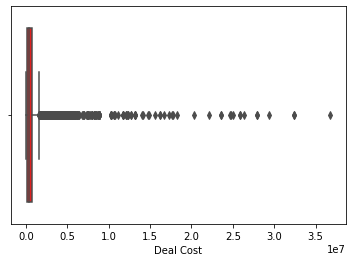

In [45]:
sns.boxplot(df["Deal Cost"], orient = "h", color = "red")

In [46]:
s = df['Deal Cost']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [47]:
outliers

{12: 2367647.06,
 13: 8823529.41,
 16: 2764705.88,
 40: 8823529.41,
 57: 4264705.88,
 63: 1911764.71,
 69: 1911764.71,
 74: 4882352.94,
 138: 2462941.18,
 148: 2029411.77,
 149: 2029411.77,
 156: 4264705.88,
 160: 3422058.82,
 181: 3741764.71,
 188: 1716764.71,
 200: 2485588.24,
 201: 1738235.29,
 206: 1875000.0,
 267: 2455000.0,
 270: 1875000.0,
 271: 4117647.06,
 281: 2941176.47,
 287: 2455000.0,
 289: 2941176.47,
 334: 5147058.82,
 352: 13235294.12,
 354: 8235294.12,
 365: 13235294.12,
 369: 5852941.18,
 386: 25882352.94,
 407: 25882352.94,
 465: 2117647.06,
 471: 2205882.35,
 482: 2117647.06,
 485: 2205882.35,
 492: 2704705.88,
 496: 5000000.0,
 510: 3088235.29,
 520: 2352941.18,
 526: 6911764.71,
 529: 6911764.71,
 541: 2441176.47,
 552: 2352941.18,
 554: 2441176.47,
 574: 1823529.41,
 578: 1823529.41,
 622: 1994117.65,
 651: 2941176.47,
 667: 6303529.41,
 687: 7352941.18,
 703: 7352941.18,
 714: 7906764.71,
 752: 2217058.82,
 762: 1697647.06,
 793: 4764705.88,
 806: 5794117.65,
 

In [48]:
len(outliers)

905

### Deal Year

In [49]:
#Deal year
df['Deal Year'] = pd.DatetimeIndex(df['Deal Date']).year

In [50]:
df["Deal Year"].value_counts()

2018    2120
2017    1738
2015    1669
2016    1637
2014    1157
2013     829
2012     582
2019     244
2011      85
Name: Deal Year, dtype: int64

<AxesSubplot:xlabel='Deal Year', ylabel='count'>

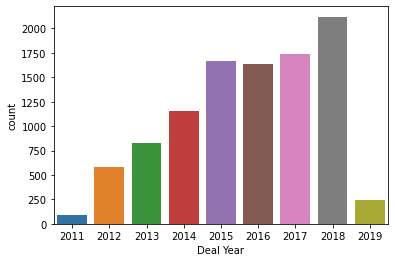

In [51]:
sns.countplot(df["Deal Year"])

<AxesSubplot:xlabel='Deal Year', ylabel='count'>

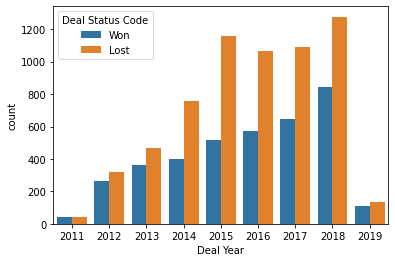

In [52]:
#Deal Year vs Deal Status Code
sns.countplot(df["Deal Year"], hue = df["Deal Status Code"])

In [53]:
pd.crosstab(df["Deal Year"],df["Deal Status Code"])

Deal Status Code,Lost,Won
Deal Year,,
2011,44,41
2012,320,262
2013,466,363
2014,755,402
2015,1155,514
2016,1067,570
2017,1089,649
2018,1277,843
2019,133,111


### Deal Month

In [54]:
#Deal Month 
df['Deal Month'] = pd.DatetimeIndex(df['Deal Date']).month

In [55]:
#Deal Month
df["Deal Month"].value_counts()

10    951
12    950
11    936
1     896
9     871
7     837
8     830
2     780
5     775
3     754
4     743
6     738
Name: Deal Month, dtype: int64

<AxesSubplot:xlabel='Deal Month', ylabel='count'>

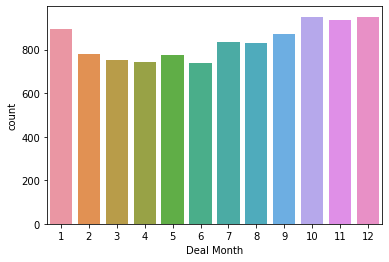

In [56]:
sns.countplot(df["Deal Month"])

<AxesSubplot:xlabel='Deal Month', ylabel='count'>

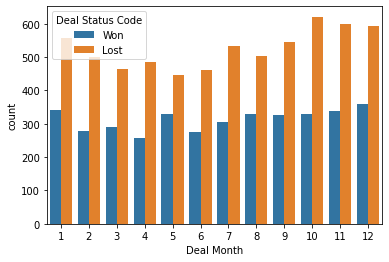

In [57]:
#Deal Month vs Deal Status Code
sns.countplot(df["Deal Month"], hue = df["Deal Status Code"])

In [58]:
pd.crosstab(df["Deal Month"],df["Deal Status Code"])

Deal Status Code,Lost,Won
Deal Month,,
1,556,340
2,501,279
3,465,289
4,486,257
5,445,330
6,462,276
7,532,305
8,502,328
9,545,326


## Deal Cost vs Deal Year

In [59]:
data = df.copy()

In [60]:
data.groupby('Deal Year')[['Deal Cost']].agg(["count","median"])

Deal Cost            
              count      median
Deal Year                      
2011             85  294117.650
2012            582  327205.880
2013            829  294117.650
2014           1157  294117.650
2015           1669  294117.650
2016           1637  389705.880
2017           1738  458529.415
2018           2120  455882.350
2019            244  430147.060

In [61]:
pd.crosstab(df["Deal Year"],df["Deal Status Code"])

Deal Status Code,Lost,Won
Deal Year,,
2011,44,41
2012,320,262
2013,466,363
2014,755,402
2015,1155,514
2016,1067,570
2017,1089,649
2018,1277,843
2019,133,111


Text(0.5, 1.0, 'Deal Cost vs Deal Year')

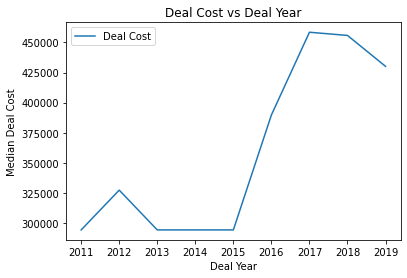

In [62]:
chart1 = data.groupby('Deal Year')[['Deal Cost']].median().plot()
plt.xlabel('Deal Year')
plt.ylabel('Median Deal Cost')
plt.title("Deal Cost vs Deal Year")

Text(0.5, 1.0, 'Deal Cost vs Deal Year')

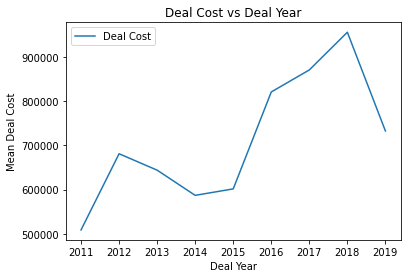

In [63]:
chart2 = data.groupby('Deal Year')[['Deal Cost']].mean().plot()
plt.xlabel('Deal Year')
plt.ylabel('Mean Deal Cost')
plt.title("Deal Cost vs Deal Year")

## Deal Cost vs Deal Status

In [64]:
data.groupby('Deal Status Code')[['Deal Cost']].agg(["count","median"])

Deal Cost           
                     count     median
Deal Status Code                     
Lost                  6306  426470.59
Won                   3755  345000.00

Text(0.5, 1.0, 'Deal Cost vs Deal Status')

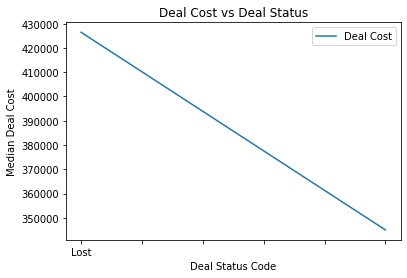

In [65]:
chart3 = data.groupby('Deal Status Code')[['Deal Cost']].median().plot()
plt.xlabel('Deal Status Code')
plt.ylabel('Median Deal Cost')
plt.title("Deal Cost vs Deal Status")

## Deal Cost vs Client Category
Go to TWB

## Deal Cost vs Location

In [66]:
data.groupby('Location')[['Deal Cost']].agg(["count", "median"])

Deal Cost            
             count      median
Location                      
L1            1572  372794.120
L10           3360  397058.820
L11            367  282352.940
L12            276  564705.885
L2               8  529411.770
L3             556  308823.530
L4             188  397058.820
L5            2328  411764.710
L6             100  352941.180
L7             238  308823.530
L8              11  882352.940
L9             240  290441.180
Others         817  441176.470

Text(0.5, 1.0, 'Deal Cost vs Location')

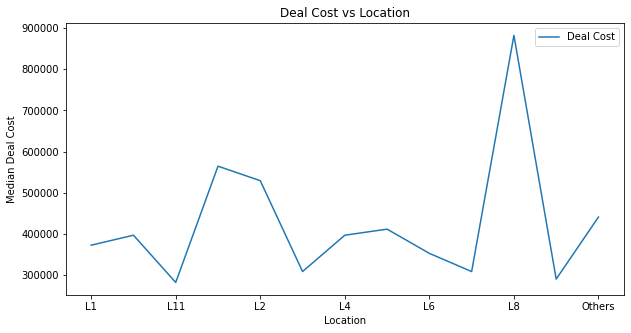

In [67]:
chart5 = data.groupby('Location')[['Deal Cost']].median()
chart5.plot(figsize=(10,5))
plt.xlabel('Location')
plt.ylabel('Median Deal Cost')
plt.title("Deal Cost vs Location")

## Deal Cost vs Sector

In [68]:
data.groupby('Sector')[['Deal Cost']].agg(["count","median"])

Deal Cost            
              count      median
Sector                         
Sector 1        231  411764.710
Sector 10         3   29411.770
Sector 11       114  544852.945
Sector 12       607  352941.180
Sector 13       185  588235.290
Sector 14       109  294117.650
Sector 15       387  397058.820
Sector 16       474  441176.470
Sector 17       474  397647.060
Sector 18       251  529411.770
Sector 19       142  431617.645
Sector 2       1748  441176.470
Sector 20       773  294117.650
Sector 21        30  244117.645
Sector 22       144  330441.175
Sector 23      2693  338235.290
Sector 24       578  593235.295
Sector 25       273  294117.650
Sector 3        135  326470.590
Sector 4        128  367647.060
Sector 5         64  294117.650
Sector 6         96  294117.650
Sector 7         14  558823.530
Sector 8         39  288235.290
Sector 9        369  632352.940

Text(0.5, 1.0, 'Deal Cost vs Sector')

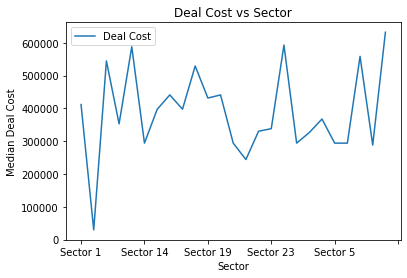

In [69]:
chart6 = data.groupby('Sector')[['Deal Cost']].median()
chart6.plot()
plt.xlabel('Sector')
plt.ylabel('Median Deal Cost')
plt.title("Deal Cost vs Sector")

## Deal Cost vs Solution Type

In [70]:
data.groupby('Solution Type')[['Deal Cost']].agg(["count","median"])

Deal Cost            
                  count      median
Solution Type                      
Solution 1            5  202941.180
Solution 10        1016  294117.650
Solution 11         140  612500.000
Solution 12         440  441176.470
Solution 13         312  460294.115
...                 ...         ...
Solution 66           1  185294.120
Solution 67         584  441176.470
Solution 7          178  352941.180
Solution 8          374  470588.240
Solution 9         1418  345882.355

[67 rows x 2 columns]

Text(0.5, 1.0, 'Deal Cost vs Solution Type')

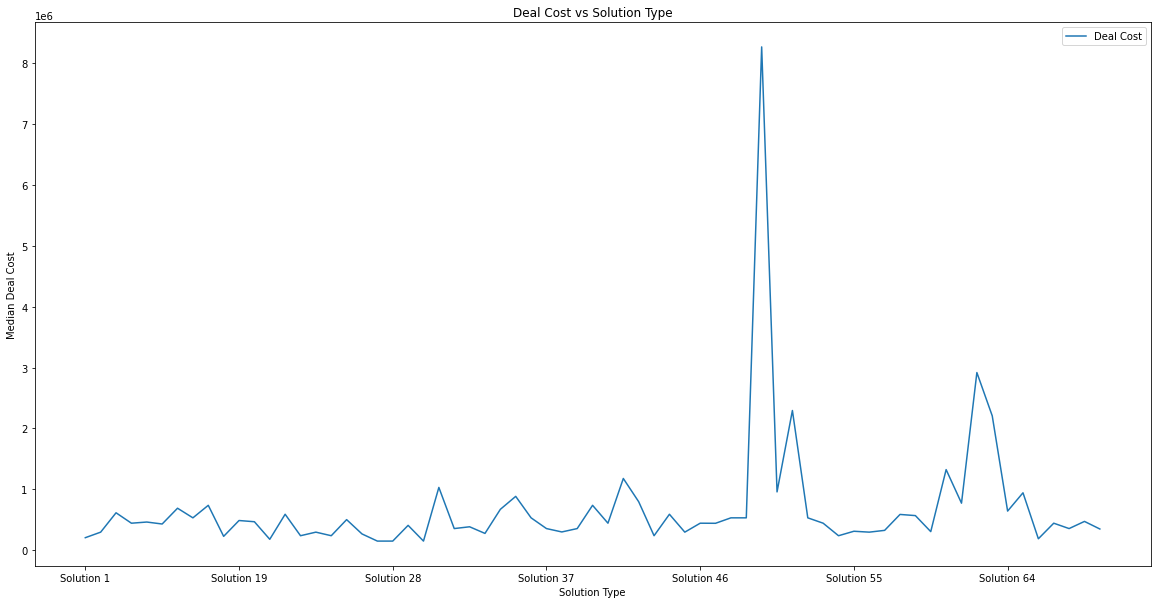

In [71]:
chart7 = data.groupby('Solution Type')[['Deal Cost']].median()
chart7.plot(figsize=(20,10))
plt.xlabel('Solution Type')
plt.ylabel('Median Deal Cost')
plt.title("Deal Cost vs Solution Type")

In [72]:
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal Year,Deal Month
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012,3
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012,9
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,8
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,4
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011,6


In [102]:
lst = df["VP Name"].unique()

In [104]:
lst

array(['Ekta Zutshi', 'Mervin\xa0Harwood', 'Sargar Deep Rao',
       'Lilli\xa0Storrs', 'Long\xa0Bergstrom', 'Rosanna\xa0Maynez',
       'Mangesh K. Singh', 'Brendon\xa0Wycoff', 'neeraj kumar',
       'Rahul Bajpai', 'Son\xa0Mcconnaughy', 'Saurabh Singh',
       'Rudraksh Sharma', 'Hardeep Suksma', 'Varsha Arora', 'som dutt',
       'Ankita Aggarwal', 'Clinton\xa0Mani', 'Marcella\xa0Mo',
       'Dennis\xa0Faux', 'Earline\xa0Langton', 'Russell\xa0Dahlen',
       'Gopa Trilochana', 'Kamelesh Srinivasan', 'Gaurav Sameria',
       'Manpreet Singh', 'Man\xa0Suddeth', 'Molly\xa0Eakes',
       'Vidur Hukle', 'Gayle\xa0Molter', 'Alam Syed', 'Rahul Kocher',
       'Vikram Rawat', 'Jewell\xa0Tunstall', 'Jitendra Choudhary',
       'Mayank Mewar', 'Kirk\xa0Hofmeister', 'P. Somya', 'Prashant Rawat',
       'Visvajeet Das', 'Waylon\xa0Mulder', 'Sarthak Batra', 'md. afsar'],
      dtype=object)

In [100]:
lst1 = df["Manager Name"].unique()

In [101]:
lst1

array(['Gopa Trilochana', 'Russell\xa0Dahlen', 'rahul sharma',
       'Vidur Hukle', 'Md. Daud', 'Hardeep Suksma', 'Luv Malhotra',
       'Lino\xa0Batterton', 'Sang\xa0Ingle', 'shafibul',
       'Anand S. Pandey', 'Molly\xa0Eakes', 'Prateek Dhotre',
       'Roopal Singh', 'Desmond\xa0Krout', 'Jean\xa0Sappington',
       'Mangesh K. Singh', 'Abhinav Warrier', 'Saurabh Singh',
       'Tanuj Bindra', 'nahar singh', 'D. Ankit ', 'Muoi\xa0Queener',
       'Ayusha Gupta', 'Rudraksh Sharma', 'Ekta Zutshi',
       'Fredricka\xa0Bald', 'Ganesh Malwar', 'Kamelesh Srinivasan',
       'Jewell\xa0Tunstall', 'Ankita Aggarwal', 'Somnath Mukherji',
       'Tafeeq Khan', 'Rosana\xa0Yokum', 'Gaurav Sameria', 'Rahul Bajpai',
       'Dennis\xa0Faux', 'Theron\xa0Rex', 'Shobhit Gupta',
       'Marcella\xa0Mo', 'Rahul Kocher', 'Akshay Sharma', 'ram kumar',
       'Sanchita Gulati', 'mohd shakib', 'Anoop Jatley', 'Ralph\xa0Bohon',
       'mohd khairul', 'Akshansh Goel', 'Rajneesh Tanwar',
       'Manpreet Sin

In [109]:
np.intersect1d(lst,lst1)

array(['Alam Syed', 'Ankita Aggarwal', 'Clinton\xa0Mani',
       'Dennis\xa0Faux', 'Earline\xa0Langton', 'Ekta Zutshi',
       'Gaurav Sameria', 'Gayle\xa0Molter', 'Gopa Trilochana',
       'Hardeep Suksma', 'Jewell\xa0Tunstall', 'Jitendra Choudhary',
       'Kamelesh Srinivasan', 'Long\xa0Bergstrom', 'Mangesh K. Singh',
       'Manpreet Singh', 'Marcella\xa0Mo', 'Mervin\xa0Harwood',
       'Molly\xa0Eakes', 'Prashant Rawat', 'Rahul Bajpai', 'Rahul Kocher',
       'Rosanna\xa0Maynez', 'Rudraksh Sharma', 'Russell\xa0Dahlen',
       'Sargar Deep Rao', 'Saurabh Singh', 'Son\xa0Mcconnaughy',
       'Varsha Arora', 'Vidur Hukle', 'Vikram Rawat', 'neeraj kumar',
       'som dutt'], dtype=object)

In [110]:
Common = pd.DataFrame(np.intersect1d(lst,lst1))

In [111]:
Common

,0
0,Alam Syed
1,Ankita Aggarwal
2,Clinton Mani
3,Dennis Faux
4,Earline Langton
5,Ekta Zutshi
6,Gaurav Sameria
7,Gayle Molter
8,Gopa Trilochana
9,Hardeep Suksma


In [188]:
df1 = df.copy()

In [189]:
df1.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal Year,Deal Month
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012,3
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012,9
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,8
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,4
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011,6


In [190]:
df1.drop("Deal Date", axis = 1, inplace = True)

In [191]:
df1.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal Year,Deal Month
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012,3
1,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012,9
2,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,8
3,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,4
4,Internal,Solution 32,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011,6


In [192]:
df1.drop("Deal Month", axis = 1, inplace = True)

In [193]:
df1.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal Year
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012
1,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012
2,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011
3,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011
4,Internal,Solution 32,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011


In [194]:
df1.rename(columns = {"Deal Status Code":"Deal_Status"}, inplace = True)

In [195]:
def Deal_Status_Code(Deal_Status):
    if Deal_Status == "Won":
        return 1
    else:
        return 0

In [196]:
df1["Deal_Status"] = df1["Deal_Status"].apply(Deal_Status_Code)

In [197]:
df1.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal_Status,Deal Year
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,1,2012
1,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,1,2012
2,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,0,2011
3,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,0,2011
4,Internal,Solution 32,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,0,2011


In [198]:
cost_0 = df1[df1["Deal Cost"]==0]

In [199]:
cost_0

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal_Status,Deal Year
79,Govt,Solution 37,Sector 12,L5,Ekta Zutshi,shafibul,0.0,0,2011
95,Others,Solution 31,Sector 16,L5,Rosanna Maynez,Ankita Aggarwal,0.0,0,2011
139,Govt,Solution 37,Sector 12,L5,Ekta Zutshi,shafibul,0.0,0,2012
150,Others,Solution 31,Sector 16,L5,Rosanna Maynez,Ankita Aggarwal,0.0,0,2012
210,Domestic Public Bank,Solution 59,Sector 2,L10,Mervin Harwood,Lino Batterton,0.0,0,2012
...,...,...,...,...,...,...,...,...,...
7886,Retail_market,Solution 9,Sector 23,L10,Mangesh K. Singh,Fredricka Bald,0.0,0,2014
7903,Tech,Solution 9,Sector 2,L10,Rosanna Maynez,Fredricka Bald,0.0,0,2015
7907,Tech,Solution 9,Sector 2,L10,Rosanna Maynez,Fredricka Bald,0.0,0,2014
7921,Retail_market,Solution 9,Sector 23,L10,Mangesh K. Singh,Fredricka Bald,0.0,0,2014


In [200]:
df2 = cost_0[cost_0["Deal_Status"] == 0];df2

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal_Status,Deal Year
79,Govt,Solution 37,Sector 12,L5,Ekta Zutshi,shafibul,0.0,0,2011
95,Others,Solution 31,Sector 16,L5,Rosanna Maynez,Ankita Aggarwal,0.0,0,2011
139,Govt,Solution 37,Sector 12,L5,Ekta Zutshi,shafibul,0.0,0,2012
150,Others,Solution 31,Sector 16,L5,Rosanna Maynez,Ankita Aggarwal,0.0,0,2012
210,Domestic Public Bank,Solution 59,Sector 2,L10,Mervin Harwood,Lino Batterton,0.0,0,2012
...,...,...,...,...,...,...,...,...,...
7871,Internal,Solution 9,Sector 20,Others,Mervin Harwood,Clinton Mani,0.0,0,2015
7886,Retail_market,Solution 9,Sector 23,L10,Mangesh K. Singh,Fredricka Bald,0.0,0,2014
7903,Tech,Solution 9,Sector 2,L10,Rosanna Maynez,Fredricka Bald,0.0,0,2015
7907,Tech,Solution 9,Sector 2,L10,Rosanna Maynez,Fredricka Bald,0.0,0,2014


In [201]:
cost_0[cost_0["Deal_Status"] == 1]

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal_Status,Deal Year
713,Others,Solution 31,Sector 6,L5,Sargar Deep Rao,Manpreet Singh,0.0,1,2013
943,Domestic Public Bank,Solution 37,Sector 2,L10,Mervin Harwood,Somnath Mukherji,0.0,1,2013
981,Domestic Bank,Solution 59,Sector 16,L1,Rosanna Maynez,Md. Daud,0.0,1,2013
10005,Domestic Private Bank,Solution 49,Sector 2,L10,Mervin Harwood,Siddhant Gaur,0.0,1,2018


Only four records are there where Deal_Status is 1 and Deal_Cost = 0

In [202]:
df2["Client Category"].value_counts().sort_values(ascending=False)

Others                   68
Internal                 40
Services_based           22
Tech                     20
Domestic Public Bank     12
International Bank       10
Insurance                 8
Govt                      8
Domestic Private Bank     6
Finance                   6
Consulting                6
Telecom                   6
Power ind                 4
Domestic Bank             4
Consumer Good             4
Research Development      2
Industries                2
Hospitality               2
Manufacturing             2
Automobiles               2
Retail_market             2
Name: Client Category, dtype: int64

In [217]:
df1.rename(columns = {"Deal Cost":"Deal_Cost"}, inplace = True)

In [218]:
def set_cost(Deal_Cost):
    if Deal_Cost == 0:
        return 352941 #median deal cost of others client category
    else:
        return Deal_Cost

In [219]:
df1["Deal_Cost"] = df1["Deal_Cost"].apply(set_cost)

In [222]:
for x in df1["Deal_Cost"].values:
    print(x)

150000.0
744705.88
60000.0
60000.0
80882.35
80882.35
526176.47
409705.88
1032352.94
558823.53
316176.47
929411.77
2367647.06
8823529.41
122058.82
529411.77
2764705.88
147058.82
73529.41
250000.0
409705.88
882352.94
882352.94
294117.65
323529.41
647058.82
279411.77
294117.65
338235.29
1176470.59
676470.59
676470.59
588235.29
239705.88
588235.29
294117.65
294117.65
90294.12
411764.71
250000.0
8823529.41
294117.65
470588.24
294.12
132352.94
294.12
1529411.77
205882.35
188235.29
191176.47
44117.65
188235.29
494117.65
529411.77
529411.77
1382352.94
294117.65
4264705.88
258823.53
122058.82
205882.35
276470.59
220588.24
1911764.71
485294.12
235294.12
176470.59
411764.71
370588.24
1911764.71
441176.47
441176.47
230882.35
441176.47
4882352.94
390588.24
441176.47
250000.0
705882.35
352941.0
250000.0
279411.77
558823.53
289705.88
294117.65
508235.29
250000.0
352941.18
352941.18
227941.18
794117.65
279411.77
220588.24
1441176.47
147058.82
352941.0
88235.29
588235.29
1382352.94
329411.77
117647.06


705882.35
352941.0
194117.65
588235.29
529411.77
823529.41
1176470.59
47058.82
352941.0
745882.35
110294.12
176470.59
352941.0
639705.88
647058.82
345588.24
202352.94
352941.0
573529.41
1470588.24
294117.65
2500000.0
176470.59
227941.18
235294.12
47058.82
352941.0
588235.29
588235.29
911764.71
1264705.88
845882.35
1903235.29
573529.41
79411.77
882352.94
12301764.71
1239411.77
639705.88
352941.0
294117.65
147058.82
1239411.77
64705.88
185294.12
294117.65
352941.0
294117.65
352941.0
1903235.29
102941.18
286764.71
69117.65
50000.0
1470588.24
82352.94
294117.65
294117.65
286764.71
2500000.0
1139705.88
50000.0
1264705.88
352941.18
205882.35
345588.24
220588.24
352941.0
294117.65
311764.71
352941.0
82352.94
407352.94
588235.29
58823.53
58823.53
176470.59
845882.35
12301764.71
1176470.59
323529.41
158823.53
723235.29
352941.0
47058.82
1139705.88
227941.18
468823.53
227941.18
158823.53
176470.59
352941.0
458823.53
468823.53
316176.47
2000000.0
291176.47
227941.18
1308529.41
191176.47
2000000.0

447058.82
264705.88
1205882.35
76470.59
169117.65
447058.82
426470.59
2852941.18
447058.82
1176470.59
436764.71
176470.59
147058.82
3000000.0
1176470.59
1176470.59
735294.12
102941.18
235294.12
294117.65
514705.88
264705.88
441176.47
735294.12
1176470.59
441176.47
176470.59
735294.12
302941.18
441176.47
36176.47
45294.12
352941.18
147058.82
514705.88
1897058.82
176470.59
576470.59
382352.94
176470.59
441176.47
226176.47
1176470.59
176470.59
400000.0
441176.47
441176.47
1897058.82
88235.29
705882.35
1420588.24
720588.24
120588.24
66176.47
128529.41
882352.94
529411.77
529411.77
32647.06
182352.94
176470.59
294117.65
183823.53
183823.53
2647058.82
705882.35
441176.47
2941176.47
80882.35
1852941.18
205882.35
470588.24
441176.47
617647.06
470588.24
264705.88
352941.0
1420588.24
441176.47
441176.47
882352.94
457352.94
294117.65
735294.12
588235.29
478529.41
294117.65
832352.94
808823.53
882352.94
411764.71
294117.65
588235.29
147058.82
23823.53
808823.53
201764.71
1139705.88
779411.77
17647

1470.59
157058.82
756470.59
135294.12
147058.82
176470.59
235294.12
294117.65
1117647.06
588235.29
257352.94
522058.82
7454117.65
200000.0
279411.77
1323529.41
1000000.0
794117.65
24630882.35
7454117.65
941176.47
117647.06
117647.06
647058.82
547352.94
522058.82
470588.24
1029411.77
529411.77
100000.0
1470588.24
794117.65
117647.06
29411.77
82352.94
132352.94
147058.82
102941.18
232352.94
294117.65
779411.77
382352.94
102941.18
95882.35
941176.47
882352.94
147058.82
183823.53
132352.94
88235.29
257352.94
147058.82
147058.82
147058.82
1470588.24
157058.82
235294.12
1000000.0
455882.35
132352.94
235294.12
205882.35
205882.35
200294.12
147058.82
300000.0
147058.82
735294.12
735294.12
323529.41
1176470.59
1176470.59
352941.0
205882.35
882352.94
352941.0
617647.06
147058.82
588235.29
588235.29
588235.29
235294.12
147058.82
147058.82
352941.18
352941.18
176470.59
176470.59
294117.65
235294.12
588235.29
529411.77
570588.24
294117.65
147058.82
588235.29
94117.65
352941.18
2941176.47
272058.82


514705.88
294117.65
1617647.06
544117.65
551470.59
500000.0
441176.47
750000.0
514705.88
433823.53
500000.0
370588.24
735294.12
897058.82
147058.82
441176.47
1441176.47
2352941.18
260294.12
500000.0
397058.82
4320294.12
301470.59
577352.94
294117.65
1294117.65
294117.65
1441176.47
4320294.12
544117.65
235294.12
294117.65
205882.35
191176.47
513235.29
535294.12
2352941.18
3735294.12
4411764.71
235294.12
750000.0
535294.12
3735294.12
458823.53
294117.65
88235.29
264705.88
500000.0
441176.47
1264705.88
323529.41
388235.29
235294.12
375000.0
1470588.24
176470.59
294117.65
1029411.77
513235.29
174117.65
782352.94
235294.12
235294.12
411764.71
176470.59
529411.77
514705.88
367647.06
823529.41
801470.59
352941.18
352941.18
422058.82
617647.06
264705.88
1029411.77
617647.06
323529.41
294117.65
176470.59
294117.65
588235.29
294117.65
661764.71
288235.29
823529.41
235294.12
441176.47
352941.18
1470.59
294117.65
1058823.53
58823.53
735294.12
264705.88
823529.41
92647.06
235294.12
441176.47
941176

588235.29
647058.82
1172352.94
647058.82
132352.94
1023529.41
701764.71
161764.71
206764.71
113823.53
352941.0
2547647.06
235294.12
294117.65
782352.94
352941.0
470588.24
470588.24
470588.24
197058.82
193823.53
441176.47
294117.65
147058.82
794117.65
470588.24
347058.82
470588.24
102941.18
535294.12
166176.47
529411.77
147058.82
161764.71
1023529.41
392647.06
705882.35
529411.77
735294.12
138823.53
58823.53
397058.82
882352.94
464705.88
352941.18
588235.29
735294.12
2547647.06
735294.12
470588.24
97058.82
735294.12
2352941.18
588235.29
294117.65
111764.71
470588.24
882352.94
2205882.35
286764.71
882352.94
750000.0
1176470.59
242647.06
367647.06
1088235.29
1470.59
58823.53
235294.12
235294.12
116764.71
205882.35
676470.59
161764.71
2205882.35
264705.88
470588.24
426470.59
319117.65
1176470.59
345588.24
294117.65
1852941.18
485294.12
220588.24
294117.65
1470.59
352941.18
205882.35
3088235.29
4411764.71
352941.18
352941.0
2058823.53
294117.65
1411764.71
1470.59
129411.77
1676470.59
352941

1000000.0
4411764.71
735294.12
2941176.47
317647.06
2205882.35
6976470.59
2647058.82
469411.77
735294.12
2205882.35
132352.94
735294.12
29411.77
176470.59
2058823.53
622941.18
588235.29
1000000.0
489117.65
404411.77
1176470.59
1008823.53
294117.65
622941.18
447058.82
441176.47
1290000.0
33823.53
441176.47
404411.77
452941.18
735294.12
735294.12
441176.47
2911764.71
2941176.47
147058.82
970588.24
1470.59
5422352.94
529411.77
529411.77
200000.0
1101176.47
485294.12
2941176.47
345588.24
88235.29
485294.12
1382352.94
5294117.65
95588.24
352941.18
35294.12
470588.24
220588.24
588235.29
911764.71
735294.12
1470588.24
470588.24
911764.71
811764.71
882352.94
202941.18
147058.82
352941.18
500000.0
867647.06
735294.12
735294.12
1470588.24
176470.59
6025000.0
1411764.71
1411764.71
176470.59
1176470.59
882352.94
148529.41
2166176.47
57058.82
95588.24
294117.65
376470.59
5150588.24
302941.18
529411.77
88235.29
235294.12
417647.06
167647.06
867647.06
294117.65
441176.47
529411.77
367647.06
1014705.8

1764705.88
264705.88
877941.18
882352.94
44117.65
1323529.41
88235.29
264705.88
1470.59
352941.0
352941.18
1176470.59
529411.77
882352.94
117647.06
176470.59
88235.29
441176.47
1164705.88
250000.0
279411.77
240000.0
264705.88
308823.53
235294.12
352941.0
1029411.77
405882.35
58823.53
555882.35
441176.47
186470.59
588235.29
157352.94
1164705.88
62647.06
176470.59
691176.47
294117.65
2794117.65
88235.29
122058.82
397058.82
1470588.24
88235.29
5000000.0
241176.47
4426470.59
294117.65
257352.94
197058.82
1441176.47
146764.71
213235.29
2117647.06
735294.12
2235294.12
735294.12
36764.71
794117.65
352941.18
273235.29
147058.82
352941.0
1470.59
229411.77
2344117.65
367647.06
2794117.65
147058.82
176470.59
1764705.88
697058.82
147058.82
2352941.18
794117.65
1470.59
176470.59
367647.06
352941.0
741176.47
938529.41
205882.35
235294.12
610294.12
1470588.24
1547058.82
250000.0
1764705.88
2941176.47
210294.12
2352941.18
176470.59
94117.65
352941.0
4020000.0
176470.59
882352.94
147058.82
1044117.65
2

16176470.59
264705.88
5691764.71
29411.77
985294.12
382352.94
367647.06
115882.35
382352.94
183823.53
294117.65
183823.53
132352.94
441176.47
352941.18
294117.65
294117.65
294117.65
2941176.47
676470.59
323529.41
213235.29
115882.35
588235.29
294117.65
294117.65
1470588.24
5588235.29
382352.94
1029411.77
397058.82
588235.29
108823.53
382352.94
1058823.53
500000.0
294117.65
397058.82
308823.53
58823.53
1085000.0
16176470.59
85882.35
205882.35
205882.35
523529.41
294117.65
5735294.12
294117.65
361764.71
735294.12
573529.41
105882.35
8382352.94
588235.29
303823.53
105882.35
2617647.06
441176.47
926470.59
338235.29
1470588.24
735294.12
735294.12
1176470.59
173529.41
308823.53
308823.53
2411764.71
725000.0
338235.29
7352.94
1176470.59
725000.0
735294.12
308823.53
7352.94
294117.65
308823.53
580882.35
441176.47
735294.12
161764.71
323529.41
294117.65
588235.29
15588235.29
2617647.06
558823.53
7352.94
7352.94
529411.77
257352.94
117647.06
323529.41
154411.77
7352.94
529411.77
941176.47
114705

1117647.06
441176.47
1470588.24
294117.65
1106176.47
3000000.0
217647.06
475294.12
294117.65
294117.65
3441176.47
452941.18
441176.47
117647.06
1816176.47
139705.88
588235.29
208823.53
3441176.47
58823.53
147058.82
529411.77
705882.35
882352.94
1070588.24
441176.47
294117.65
441176.47
1176470.59
441176.47
158823.53
308823.53
1382352.94
500000.0
224117.65
416176.47
705882.35
294117.65
441176.47
294117.65
2941176.47
294117.65
224117.65
417647.06
441176.47
294117.65
147058.82
500000.0
73529.41
147058.82
1470.59
70588.24
2058823.53
417647.06
882352.94
132352.94
302647.06
191176.47
105882.35
308823.53
852941.18
150000.0
147058.82
205882.35
223529.41
352941.18
125000.0
455882.35
229411.77
764705.88
117647.06
294117.65
388235.29
29411.77
426470.59
455882.35
764705.88
230588.24
1470.59
13235294.12
264705.88
3278235.29
5676470.59
426470.59
1014705.88
441176.47
705882.35
2517647.06
73529.41
294117.65
439705.88
13235294.12
523529.41
1323529.41
58823.53
411764.71
220588.24
158823.53
294117.65
1852

In [223]:
df1.isnull().sum()

Client Category    79
Solution Type       0
Sector              0
Location            0
VP Name             0
Manager Name        0
Deal_Cost           0
Deal_Status         0
Deal Year           0
dtype: int64

In [225]:
df1["Client Category"].fillna("Others",inplace = True)

In [227]:
df1.isnull().sum()

Client Category    0
Solution Type      0
Sector             0
Location           0
VP Name            0
Manager Name       0
Deal_Cost          0
Deal_Status        0
Deal Year          0
dtype: int64

In [228]:
df1.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal_Cost,Deal_Status,Deal Year
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,1,2012
1,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,1,2012
2,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,0,2011
3,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,0,2011
4,Internal,Solution 32,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,0,2011


In [232]:
df1.to_csv("checking_data.csv", index = False)

# EDA with Pandas Profiling

In [3]:
data = pd.read_csv("Win_Prediction_Data.csv")

In [4]:
data.head()

,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [6]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [7]:
profile = ProfileReport(data, title='Pandas Profiling Report', explorative=True)

In [8]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
profile.to_file("EDA_report.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]